# Pandas

This notebook introduces one of the most useful modules for data analysis called [Pandas][pandas]. Pandas extends the functionality of [numpy][numpy] specifically for data handling, manipulation and analysis. 


[numpy]: http://numpy.org 
[pandas]: http://pandas.pydata.org

In [1]:
import numpy as np #it may not be necessary but always good to have numpy in the background.
import pandas as pd #importing pandas 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

Data
----
We will be using a dataset that contains data on murder rates from different states in United States. Details of the dataset can be found in the following article.

In [5]:
m = pd.read_excel('mur.xlsx', sheet_name='mur', header=0, index_col=0)

List of the variable names can be accessed via the *columns* attribute. 

In [7]:
m.columns

Index(['Index', 'AGE', 'LF', 'M', 'NW', 'PC', 'POP', 'PX', 'SOUTH', 'T', 'U',
       'URB', 'W', 'X', 'XPOS'],
      dtype='object')

The index can be assessed via the *index* attribute. The index in this case is the list of different states in the US. 

In [8]:
m.index

Index(['Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Iowa', 'Idaho', 'Illinois',
       'Indiana', 'Kansas', 'Kentucky', 'Louisana', 'Massachusetts',
       'Maryland', 'Maine', 'Minnesota', 'Missouri', 'Mississipi', 'Montana',
       'North Carolina', 'Nebraska', 'New Hampshire', 'New Jersey',
       'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Virgina', 'Washington', 'Wisconsin',
       'West Virgina', 'Wyoming'],
      dtype='object', name='State')

*Pandas* is deeply integrated with numpy. In general, it is possible to treat pandas dataframe as a numpy array in most functions. 

{'whiskers': [<matplotlib.lines.Line2D at 0x11adafc90>,
 'caps': [<matplotlib.lines.Line2D at 0x11adbd710>,
 'boxes': [<matplotlib.lines.Line2D at 0x118d99090>],
 'medians': [<matplotlib.lines.Line2D at 0x11adbdc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x11adc3690>],
 'means': []}

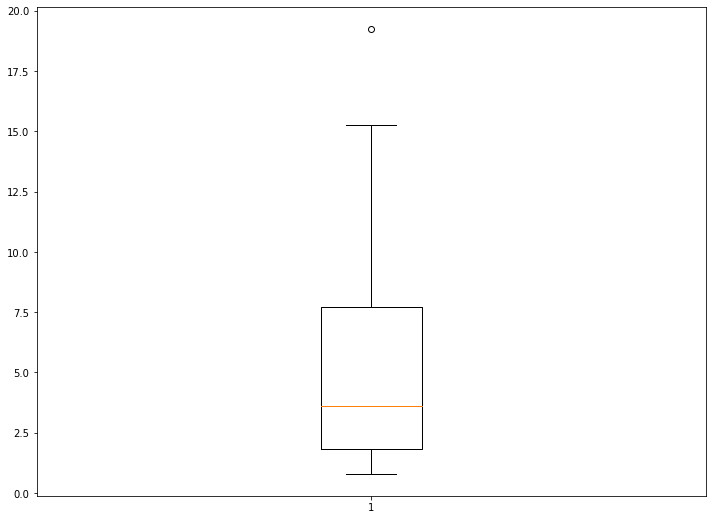

In [9]:
plt.boxplot(m['M'])

Pandas itself is also deeply integrated with matplotlib and some of the plotting functions can be directly assessed as methods in the dataframe. 

In [10]:
m['M'].hist()

Some descriptive statistics, such as *skewness* and *kurtosis* can be calculated by calling different methods in the dataframe object. 

In [11]:
m.skew(), m.kurtosis()

(Index    0.000000
 AGE      0.431243
 LF      -0.296058
 M        1.214964
 NW       1.493456
 PC       1.816705
 POP      1.866350
 PX       3.138934
 SOUTH    0.695176
 T        0.702015
 U        0.598048
 URB      0.616294
 W       -0.666538
 X       -1.132984
 XPOS    -1.517153
 dtype: float64, Index    -1.200000
 AGE      -0.710883
 LF        0.116763
 M         0.932466
 NW        1.464565
 PC        3.845664
 POP       2.790112
 PX       13.766933
 SOUTH    -1.591253
 T         0.096471
 U         0.023441
 URB       0.089938
 W        -0.083430
 X         1.437444
 XPOS      0.313921
 dtype: float64)

The method *describe* is also useful 

In [13]:
m.describe()

Index        AGE         LF          M         NW         PC  \
count  44.000000  44.000000  44.000000  44.000000  44.000000  44.000000   
mean   22.500000   0.149274   0.530659   5.403848   0.105686   0.260455   
std    12.845233   0.012628   0.024801   4.464165   0.113994   0.141659   
min     1.000000   0.127784   0.470000   0.807000   0.003204   0.108282   
25%    11.750000   0.139687   0.515000   1.808800   0.022197   0.166468   
50%    22.500000   0.146400   0.534000   3.621100   0.064083   0.226191   
75%    33.250000   0.160196   0.545250   7.724825   0.144598   0.320140   
max    44.000000   0.177759   0.588000  19.252300   0.454484   0.756579   

             POP         PX      SOUTH           T          U        URB  \
count  44.000000  44.000000  44.000000   44.000000  44.000000  44.000000   
mean   14.007295   0.060296   0.340909  136.431818   0.046750  51.715909   
std    16.325615   0.068631   0.479495   61.666921   0.015798  15.275683   
min     0.601000   0.000000   0.000000   34.000000   0.018000  27.600000   
25%     3.652500   0.025974   0.000000   92.500000   0.035000  40.250000   
50%     8.275000   0.045142   0.000000  124.000000   0.044500  50.300000   
75%    15.225000   0.082067   1.000000  179.000000   0.054250  58.000000   
max    66.100000   0.400000   1.000000  298.000000   0.088000  88.400000   

                 W          X       XPOS  
count    44.000000  44.000000  44.000000  
mean   1779.522727   0.289040   0.795455  
std     395.357800   0.024968   0.408032  
min     758.000000   0.209235   0.000000  
25%    1548.250000   0.280129   1.000000  
50%    1827.500000   0.295500   1.000000  
75%    2065.250000   0.302374   1.000000  
max    2389.000000   0.324932   1.000000

In the data *SOUTH* is a dummy variable used to indicate if a state is a southern state. Some may argue that Southern States might behave different to Northern State. So it is desirable to separate the data. One way to do this is to use the method *groupby*

In [14]:
m_south = m.groupby(['SOUTH'])

In [15]:
m_south['M'].describe()

count       mean       std     min     25%      50%       75%      max
SOUTH                                                                        
0       29.0   2.970593  1.880478  0.8070  1.4085   2.8048   3.70620   8.3135
1       15.0  10.108140  4.261682  2.8339  7.5253  10.4411  12.06465  19.2523

We can extract the data from the Southern states only by using *get_group*

In [18]:
m_issouth = m_south.get_group(1)

In [19]:
m_issouth.describe()

Index        AGE         LF          M         NW         PC  \
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000   
mean   22.133333   0.159609   0.518000  10.108140   0.215667   0.248790   
std    14.386833   0.011127   0.029689   4.261682   0.118140   0.152222   
min     1.000000   0.138485   0.470000   2.833900   0.057475   0.124469   
25%    11.000000   0.154436   0.490500   7.525300   0.133335   0.177899   
50%    21.000000   0.160966   0.512000  10.441100   0.218400   0.226962   
75%    36.000000   0.166373   0.544500  12.064650   0.293186   0.262354   
max    43.000000   0.177759   0.562000  19.252300   0.454484   0.756579   

             POP         PX  SOUTH           T          U        URB  \
count  15.000000  15.000000   15.0   15.000000  15.000000  15.000000   
mean    9.390000   0.069495    1.0   95.933333   0.039867  41.400000   
std     7.637404   0.048337    0.0   34.872147   0.005527  10.798677   
min     1.290000   0.032143    1.0   34.000000   0.031000  27.600000   
25%     4.320000   0.038863    1.0   74.500000   0.035500  32.100000   
50%     8.670000   0.053846    1.0   95.000000   0.039000  40.100000   
75%    10.750000   0.083283    1.0  124.000000   0.045500  50.200000   
max    34.200000   0.216000    1.0  161.000000   0.048000  59.800000   

                 W          X  XPOS  
count    15.000000  15.000000  15.0  
mean   1400.600000   0.294667   1.0  
std     374.673153   0.018363   0.0  
min     758.000000   0.267534   1.0  
25%    1194.000000   0.279403   1.0  
50%    1353.000000   0.297602   1.0  
75%    1569.500000   0.303878   1.0  
max    2066.000000   0.324932   1.0

Another consideration is that some states had execution and some states did not. To examine if the murder rate is different between these states we can group them based on both *SOUTH* and *XPOS*. 

In [20]:
M = m.loc[:, ['M','SOUTH', 'XPOS']]
M.groupby(['SOUTH','XPOS']).describe()

M                                                              \
           count       mean       std     min       25%       50%        75%   
SOUTH XPOS                                                                     
0     0      9.0   1.865144  1.015016  0.8070  1.108400   1.67210   2.707200   
      1     20.0   3.468045  1.984467  1.0156  1.766675   3.34015   4.280975   
1     1     15.0  10.108140  4.261682  2.8339  7.525300  10.44110  12.064650   

                     
                max  
SOUTH XPOS           
0     0      3.7062  
      1      8.3135  
1     1     19.2523

Exercise
========
What can you infer from the above table regarding murder rate? 

In [28]:
#Extract data for Southern and XPOS states using the logical operaator '&'
m_southxpos = m.loc[(m['SOUTH']==1)&(m['XPOS']==1),:]

In [29]:
m_southxpos.describe()

Index        AGE         LF          M         NW         PC  \
count  15.000000  15.000000  15.000000  15.000000  15.000000  15.000000   
mean   22.133333   0.159609   0.518000  10.108140   0.215667   0.248790   
std    14.386833   0.011127   0.029689   4.261682   0.118140   0.152222   
min     1.000000   0.138485   0.470000   2.833900   0.057475   0.124469   
25%    11.000000   0.154436   0.490500   7.525300   0.133335   0.177899   
50%    21.000000   0.160966   0.512000  10.441100   0.218400   0.226962   
75%    36.000000   0.166373   0.544500  12.064650   0.293186   0.262354   
max    43.000000   0.177759   0.562000  19.252300   0.454484   0.756579   

             POP         PX  SOUTH           T          U        URB  \
count  15.000000  15.000000   15.0   15.000000  15.000000  15.000000   
mean    9.390000   0.069495    1.0   95.933333   0.039867  41.400000   
std     7.637404   0.048337    0.0   34.872147   0.005527  10.798677   
min     1.290000   0.032143    1.0   34.000000   0.031000  27.600000   
25%     4.320000   0.038863    1.0   74.500000   0.035500  32.100000   
50%     8.670000   0.053846    1.0   95.000000   0.039000  40.100000   
75%    10.750000   0.083283    1.0  124.000000   0.045500  50.200000   
max    34.200000   0.216000    1.0  161.000000   0.048000  59.800000   

                 W          X  XPOS  
count    15.000000  15.000000  15.0  
mean   1400.600000   0.294667   1.0  
std     374.673153   0.018363   0.0  
min     758.000000   0.267534   1.0  
25%    1194.000000   0.279403   1.0  
50%    1353.000000   0.297602   1.0  
75%    1569.500000   0.303878   1.0  
max    2066.000000   0.324932   1.0

{'boxes': [<matplotlib.lines.Line2D at 0x113783c50>],
 'caps': [<matplotlib.lines.Line2D at 0x11378ef60>,
 'fliers': [<matplotlib.lines.Line2D at 0x113795da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113795780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x113783e10>,
  <matplotlib.lines.Line2D at 0x11378e9e8>]}

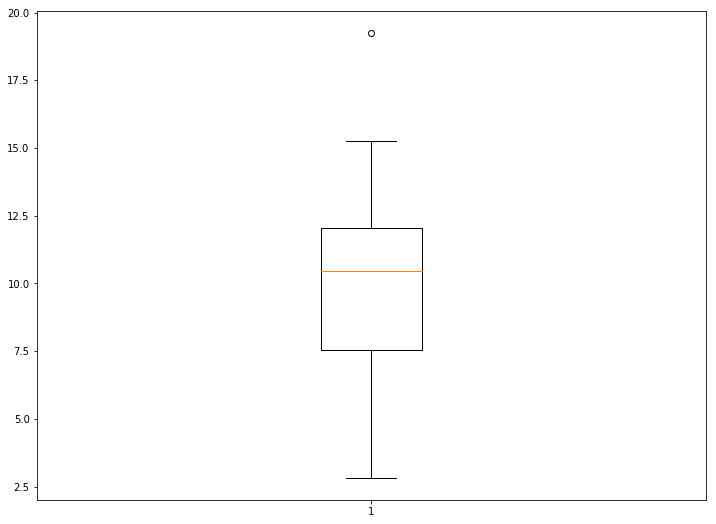

In [30]:
#Boxplot for the Southern and XPOS states! 
plt.boxplot(m_southxpos['M'])

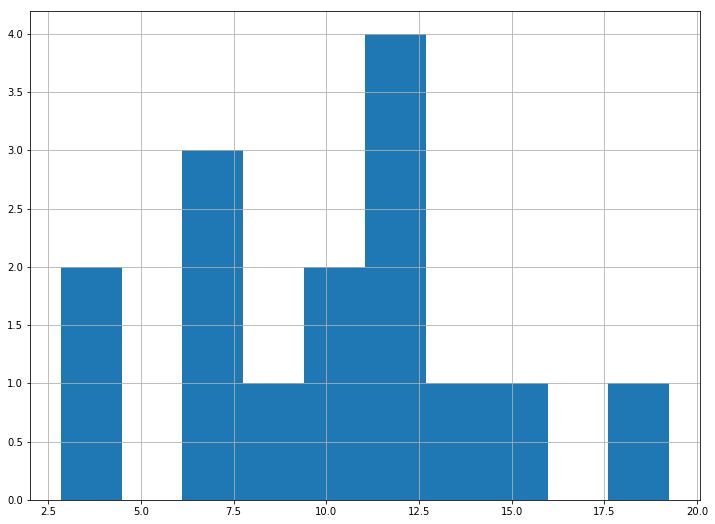

In [31]:
#Histogram for Souther and XPOS States
m_southxpos['M'].hist()

In [32]:
m.groupby(['SOUTH','XPOS'])['PC','PX'].describe()

PC                                                              \
           count      mean       std       min       25%       50%       75%   
SOUTH XPOS                                                                     
0     0      9.0  0.301837  0.183787  0.120316  0.137514  0.341794  0.377809   
      1     20.0  0.250581  0.114446  0.108282  0.186227  0.217772  0.294657   
1     1     15.0  0.248790  0.152222  0.124469  0.177899  0.226962  0.262354   

                        PX                                                    \
                 max count      mean       std       min       25%       50%   
SOUTH XPOS                                                                     
0     0     0.671923   9.0  0.000000  0.000000  0.000000  0.000000  0.000000   
      1     0.592128  20.0  0.080530  0.081966  0.011765  0.040000  0.065384   
1     1     0.756579  15.0  0.069495  0.048337  0.032143  0.038863  0.053846   

                             
                 75%    max  
SOUTH XPOS                   
0     0     0.000000  0.000  
      1     0.089285  0.400  
1     1     0.083283  0.216

**Questions:** 

1. Can you explain why there are only three classes when it supposes to be 4? 
2. All the descriptive statistics for $PX$ in the case $SOUTH=0$ and $XPOS=0$ is 0. Why? 

## Exercise

1. Download and import the data from the CSV file "trade.csv". 
2. Produce descriptive statistics based on each pair of country1 and country2 **Hint:** use groupby based on (country1, country2).

## Pivot Table

It is also possible to generate pivot table using Pandas. Let's assume we want to examine the inter-relation between South and XPOS further. 

In [28]:
south_xpos = m.pivot_table(values='M', index='SOUTH', columns='XPOS')
south_xpos

XPOS          0          1
SOUTH                     
0      1.865144   3.468045
1           NaN  10.108140

In [33]:
south_xpos_W = m.pivot_table(values='W', index='SOUTH', columns='XPOS', aggfunc=np.sum)
south_xpos_W

XPOS         0        1
SOUTH                  
0      16889.0  40401.0
1          NaN  21009.0

## Exercises

The exercises below utilises the "trade.csv" dataset. 

1. Construct a pivot table that shows the distance between all trade relationships. 
2. Construct a pivot table that shows the mean export for each trade relationship over time. 
